# **SpatioTemporal Asset Catalog (STAC)**

## 1. STAC Inquiry
### 1.1 What is STAC?
The SpatioTemporal Asset Catalog (STAC) provides programmatic access to the Earth Observation metadata index with a wide variety of metadata field parameters available for searching. STAC has common set of search terms so geospatial information can be found and indexed efficiently and quickly. The spatial-temporal organization of data arranges the assets across time and space.

### 1.2 The Motivation for creating STAC
Groups working with spatial data have not been aware of the given spatial standards that are common in other areas of research. Moreover, data is oftern dispersed and difficult to collect, especially with the multiple search tools required to obtain the different types of data. With the creation of STAC, retrieving satellite data has become easier.

The main goal of STAC is to implement global index of satellite, aerial, and other spatial imagery derived from geospatial LiDAR, SAR, Full Motion Video, and Hyperspectral sensors.

### 1.3 Who can use STAC?
Anyone can! STAC is set up in a way where professional and non-professionals can easily query and retrieve data. 

### 1.4 How does STAC work?
Data can be uploaded into STAC once released, and from there the data can be indexed and discovered through common search terms and methods to access information. STAC has a specification organized structure, detailed in the STAC Specification. 
The STAC organization has 4 main specifications:

- **STAC Item:** Spatiotemporal data expressed as a GeoJSON specification.
- **STAC Catalog:** Structure for browsing and cataloging items.
- **STAC Collection:** Extension of the Catalog, providing information of the items, license information, and other metadata. Each collection is a different dataset with the items metadata. 
- **STAC API:** API to enables the search engine quality for the data using WFS3 format.


### 1.5 When to use STAC?
With the growth of geographic data science, accessing bulks of satellite and aerial images in a quick manner is essential. STAC provides this functionality as it can index data in a quick and efficient manner. Any open access data collection with direct links to the data available can be added to the STAC Catalog for future indexing. STAC's capabilities of indexing allows to search for specific items according to the data attributes, such as bounding box, geometry, date range, and item properties.


## 2. The Benefits
The STAC specification standardizes geospatial metadata structures which are adaptable to existing implementations. The core philosophy is to enable maximum flexibility of use. Another benefit is that it uses links (URLs) to enable modeling of much more complex relationships. In addition, it provides human readable HTML representations of STAC items in the STAC catalog. 

## 3. GeoAnalytics Canada's STAC Server
The GeoAnalytics Canada platform has implemented the STAC Catalog API to be used across the platform and provide easy access to geospatial assets that are openly searchable. As of now, Landsat 8 data is available for querying and accessing. With the use of your API Token, geospatial data can be searched, updated, and analyzed through the GeoAnalytics tools, such as creating a dataframe with the data in a notebook in our GeoAnalytics JupyterLab, or even calling the STAC items in the Desktop VM.

## 4. PySTAC Client, StackSTAC, STAC-nb

PySTAC Client is a Python package that makes it easier for us to work programatically with STAC Catalogs and APIs. It does this by offering higher-level functionality and the ability to make better use of STAC API search endpoints.

StackSTAC is a Python package that enables us to transform a pystac query result into a xarray.DataArray using Dask. By doing so we are then able to conduct analyses on the data we queried from a STAC server!

STAC-nb is a Python package that allows us to query open STAC servers (such as Planetary Computer's) in a very user friendly way (point and click). It does this by building upon our next package: the PySTAC Client

To use these packages we must first import them:

In [ ]:
!pip install stac_nb

In [2]:
import urllib
import requests
import stackstac

import numpy as np
import geopandas as gpd

from pystac_client import Client
from stac_nb import STAC_Query_UI
from shapely.geometry import Polygon 

## 5. STAC Example
In this example we are going to use the open Planetary Computer STAC API. It has many different datasets (for more information visit https://planetarycomputer.microsoft.com/catalog).

In [3]:
STAC_BASE_URL = "https://planetarycomputer.microsoft.com/api/stac/v1"  

Now that we know what collections are currently available in the GEOAnalytics STAC server let's use PySTAC Client to query only the Landsat8-Level1 collection

### 5.1. How to query a STAC server
Here is an example demonstrating how to query the STAC server using both the STAC-nb User Interface (UI) and PySTAC Client. Once the data has been queried you'll learn how to store it into an XArray.dataarray, using StackSTAC.

In this example you'll learn how to query the GeoAnalytics STAC server by collection, date range, AOI, and for specific Bands. 

1. Start by accessing the GeoAnalytics STAC server using PySTAC Client
2. Create a polygon and convert it into a geopandas GeoDataFrame, for use as our AOI.
3. Set the remaining parameters necessary for your query.
4. Query the STAC server using STAC-nb.
5. Query the STAC server using PySTAC Client.
6. Ingest the output of your Query into an XArray.dataarray, using StackSTAC.

In [4]:
# Use Pystac Client to access the Geoanalytics STAC server
catalog = Client.open(STAC_BASE_URL)

In [5]:
# Create a polygon for defining our Area of Interest (AOI) in this case we are using a rough outline of Vancouver, BC created using: https://www.keene.edu/campus/maps/tool/
polygon={
      "coordinates": [
        [
          [
            -123.1460953,
            49.2792286
          ],
          [
            -123.242569,
            49.2895303
          ],
          [
            -123.2666016,
            49.2669084
          ],
          [
            -123.2120132,
            49.2272391
          ],
          [
            -123.1419754,
            49.2030184
          ],
          [
            -123.1313324,
            49.2675805
          ],
          [
            -123.1460953,
            49.2792286
          ]
        ]
      ],
      "type": "Polygon"
    }

In [6]:
lon_list = []
lat_list = []

for lon,lat in polygon['coordinates'][0]:
    lon_list.append(lon)
    lat_list.append(lat)
polygon_geom = Polygon(zip(lon_list, lat_list))
crs = 'EPSG:4326'
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])
polygon

,geometry
0,"POLYGON ((-123.14610 49.27923, -123.24257 49.2..."


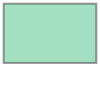

In [7]:
FOOTPRINT = polygon.to_crs('epsg:4326').geometry[0].envelope
FOOTPRINT

In [8]:
FOOTPRINT.bounds

(-123.2666016, 49.2030184, -123.1313324, 49.2895303)

#### 5.1.1 How to query a STAC server with STAC-nb

STAC-nb is a new Python package that builds upon PySTAC Client to provide a 'point and click' method for users to query STAC APIs.

In [9]:
ui = STAC_Query_UI(STAC_BASE_URL)
ui.display()

STAC_Query_UI(children=(Tab(children=(VBox(children=(SelectMultiple(description='Collection(s):', layout=Layou…

In order to visualize the results of our query we can use the query_results function. It allows us to see footprint of the images our query has returned, as well as preview the image itself.

In [11]:
ui.query_results

[<Item id=S2A_MSIL2A_20211231T191821_R056_T10UDV_20220101T171049>,
 <Item id=S2B_MSIL2A_20211229T192819_R099_T10UDV_20211230T225332>,
 <Item id=S2B_MSIL2A_20211226T191819_R056_T10UDV_20211227T045333>,
 <Item id=S2A_MSIL2A_20211224T192821_R099_T10UDV_20211225T070139>,
 <Item id=S2A_MSIL2A_20211221T191821_R056_T10UDV_20211222T211843>,
 <Item id=S2B_MSIL2A_20211219T192819_R099_T10UDV_20211220T034348>,
 <Item id=S2B_MSIL2A_20211216T191809_R056_T10UDV_20211217T103000>,
 <Item id=S2A_MSIL2A_20211214T192821_R099_T10UDV_20211215T080322>,
 <Item id=S2A_MSIL2A_20211211T191811_R056_T10UDV_20211212T145753>,
 <Item id=S2B_MSIL2A_20211209T192809_R099_T10UDV_20211210T062943>]

We can also visualize the results of our query in json format, by using the following command:

In [ ]:
ui.query_results[0].to_dict()

If we wish to return a list of PySTAC items in order to keep working with the results in Python, we can simply use:

In [13]:
list(ui.query_results)

[<Item id=S2A_MSIL2A_20211231T191821_R056_T10UDV_20220101T171049>,
 <Item id=S2B_MSIL2A_20211229T192819_R099_T10UDV_20211230T225332>,
 <Item id=S2B_MSIL2A_20211226T191819_R056_T10UDV_20211227T045333>,
 <Item id=S2A_MSIL2A_20211224T192821_R099_T10UDV_20211225T070139>,
 <Item id=S2A_MSIL2A_20211221T191821_R056_T10UDV_20211222T211843>,
 <Item id=S2B_MSIL2A_20211219T192819_R099_T10UDV_20211220T034348>,
 <Item id=S2B_MSIL2A_20211216T191809_R056_T10UDV_20211217T103000>,
 <Item id=S2A_MSIL2A_20211214T192821_R099_T10UDV_20211215T080322>,
 <Item id=S2A_MSIL2A_20211211T191811_R056_T10UDV_20211212T145753>,
 <Item id=S2B_MSIL2A_20211209T192809_R099_T10UDV_20211210T062943>]

Unfortunately the STAC-nb UI does have some limitations. As of June 15th 2022, it does not allow the user to query based on Band Name,Cloud Cover, or Seasonality.

#### 5.1.2 How to query a STAC server with PySTAC Client

PySTAC Client is the package that STAC-nb is based upon. It may not be as user friendly, but it does have more functionality. In the follwing section we are going to show you how to query based on Band of Interest, Maximum Cloud Cover, and Seasonality (in addition to the other search parameters used by STAC-nb).

In [14]:
# CONFIG 
# -------------
TGT_BANDS =  ['B04', 'B08']
YEAR = ['2016']
BEGIN_MONTH = '01'
END_MONTH = '12'
MAX_CLOUD = 100
RESOLUTION = 10
# -------------

In [17]:
date_range = f'{YEAR[0]}-{BEGIN_MONTH}-01/{YEAR[0]}-{END_MONTH}-30'
items = catalog.search(
        collections = ['sentinel-2-l2a'],
        intersects = FOOTPRINT,
        query={"eo:cloud_cover": {"lt": MAX_CLOUD}},
        datetime = date_range,
    ).get_all_items()

## 6. Working with the results of your STAC query

Once you have queried the data from the STAC API you can start manipulating it in your code thanks to stackSTAC. StackSTAC ingests the ouput of your query and returns an Xarray.dataarray. 

In [18]:
data = (
    stackstac.stack(
        items,
        assets=TGT_BANDS, 
        resolution=RESOLUTION, # Set all bands res to this
        bounds_latlon=FOOTPRINT.bounds, # clip to AOI bounds
        epsg = 32610
    ).where(lambda x: x > 0, other=np.nan).assign_coords( # Convert nodata zero to np.nan
        band=lambda x: x.common_name.rename("band"),  # use common names
        time=lambda x: x.time.dt.round(
            "D"
        ))  
)

data

/srv/conda/envs/notebook/lib/python3.9/site-packages/stackstac/prepare.py:413: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  xs = pd.Float64Index(np.linspace(minx, maxx, width, endpoint=False))
/srv/conda/envs/notebook/lib/python3.9/site-packages/stackstac/prepare.py:414: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ys = pd.Float64Index(np.linspace(maxy, miny, height, endpoint=False))


,Array,Chunk
Bytes,450.99 MiB,7.27 MiB
Shape,"(31, 2, 965, 988)","(1, 1, 965, 988)"
Count,310 Tasks,62 Chunks
Type,float64,numpy.ndarray


## 7. Further Documentation
Here are resources for a deeper look into the SpatioTemporal Assest Catalog and its API:

- **Link to GEOAnalytics Canada STAC: https://stac.geoanalytics.ca/**
- **The STAC Specification: https://github.com/radiantearth/stac-spec**
- **The STAC API Specification: https://github.com/radiantearth/stac-api-spec**
- **GEOAnalytics STAC FastAPI using Swagger: https://stac.geoanalytics.ca/docs**
    - Documentation for the STAC FastAPI: https://github.com/stac-utils/stac-fastapi
-- **The STAC-nb Specification: https://stac-nb.readthedocs.io/en/latest/**